# Objective

 To predict the concrete strength using the data available in file concrete_data.xls. Apply feature engineering and model tuning to obtain 80% to 95% of R2score.

# Import libraries

In [195]:
#Import necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 

# Import dataset

In [196]:
df = pd.read_csv(r'C:\Users\zehra.hussain\DataScience\Course\FeatureEngineering\data\concrete.csv') # Read the data.

In [197]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [198]:
df.shape

(1030, 9)

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


# Univariate Analysis

In [200]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


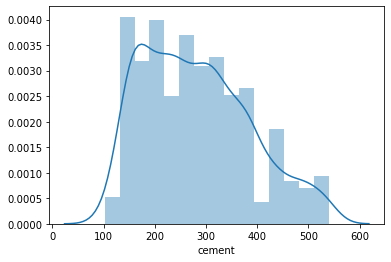

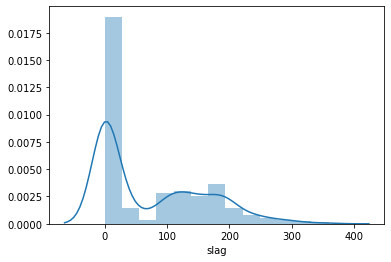

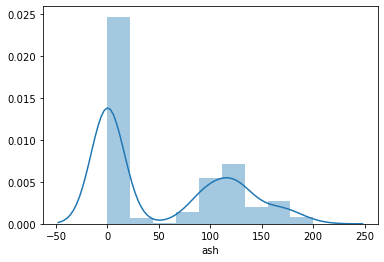

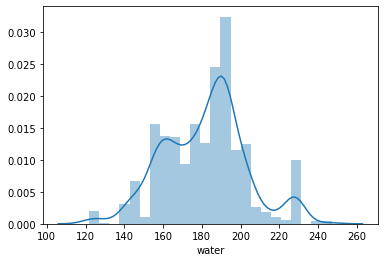

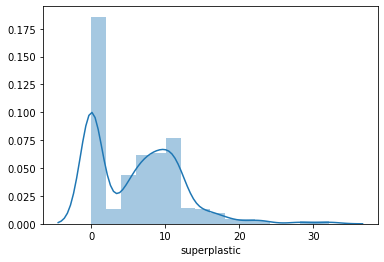

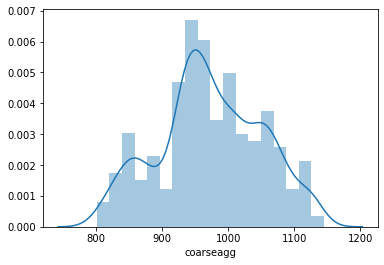

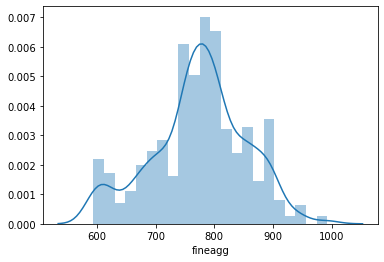

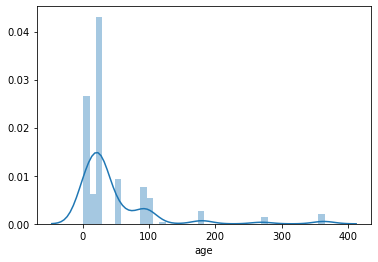

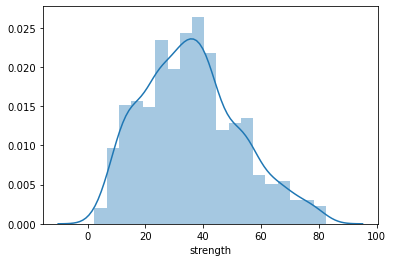

In [201]:
for i in ['cement','slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age', 'strength']:
    sns.distplot(df[i])
    plt.show()

In [202]:
df.slag[df['slag']==0].count()

471

In [203]:
df.ash[df['ash']==0].count()

566

In [204]:
df.superplastic[df['superplastic']==0].count()

379

In [205]:
df.age[df['age']>360].count()

14

## Correlations

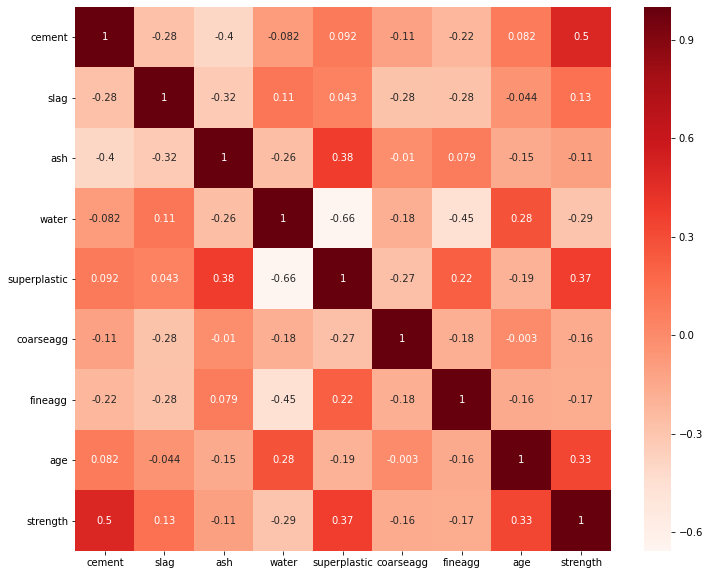

In [206]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# Scaling 

In [207]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled= scaler.fit_transform(df)
dff=pd.DataFrame(scaled)
dff.columns = ['cement','slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age', 'strength']

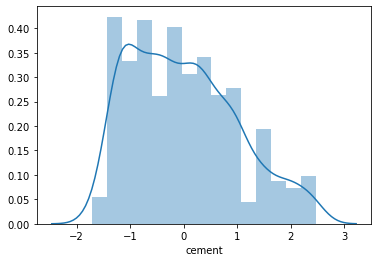

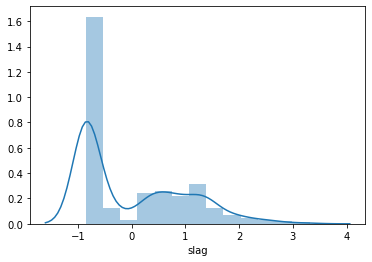

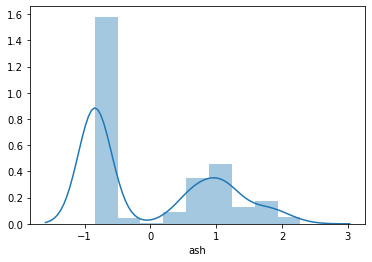

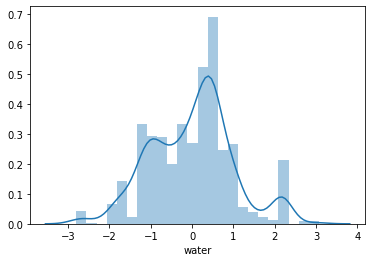

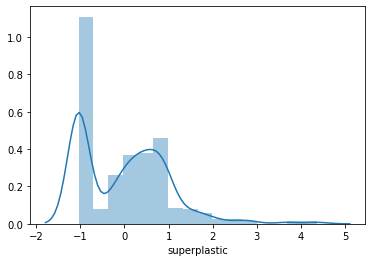

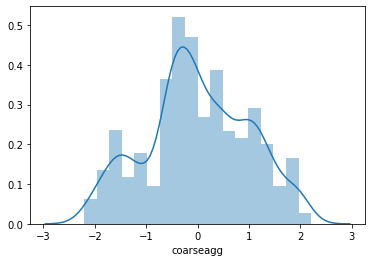

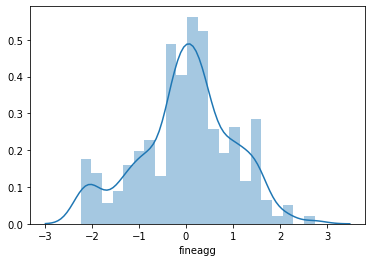

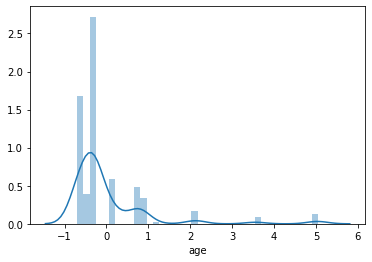

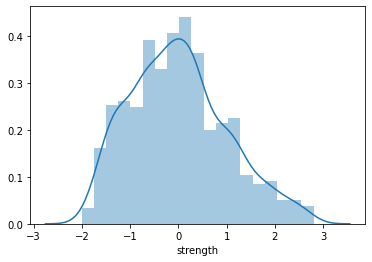

In [208]:
for i in ['cement','slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age', 'strength']:
    sns.distplot(dff[i])
    plt.show()

## Split Data into Training, Test and Validation Sets

In [209]:
## Define X and Y variables
X = df.drop('strength', axis=1)
Y = df[['strength']]

In [210]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=20)

In [211]:
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.50,random_state=20)

### Linear Regression

In [212]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [213]:
y_pred = reg.predict(X_test)

In [214]:
print('Train Mean squared error: %.2f'% mean_squared_error(y_test, y_pred))
print('Train Variance score: %.2f'% r2_score(y_test, y_pred))

Train Mean squared error: 113.54
Train Variance score: 0.63


### Using Piplelines

In [215]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# prepare the model with input scaling
pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])
# fit pipeline
pipeline.fit(X_train, y_train)
# make predictions
ypre = pipeline.predict(X_test)


In [216]:
resultsDf = pd.DataFrame({'Method':['Linear Regression'], 'MSE': mean_squared_error(y_test, ypre)
                         ,'r2' : r2_score(y_test, ypre)})
reg.score(X_test, y_test)

resultsDf = resultsDf[['Method', 'MSE','r2']]
resultsDf

,Method,MSE,r2
0,Linear Regression,113.544426,0.62847


### RandomForestRegressor

In [217]:
from sklearn.ensemble import RandomForestRegressor
# prepare the model with input scaling
pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('model', RandomForestRegressor(max_depth=2, random_state=0))])
# fit pipeline
pipeline.fit(X_train, y_train)
# make predictions
ypreRR = pipeline.predict(X_test)


In [218]:
resultsDf_RR = pd.DataFrame({'Method':['RandomForest'], 'MSE': mean_squared_error(y_test, ypreRR)
                         ,'r2' : r2_score(y_test, ypreRR)})

resultsDf = pd.concat([resultsDf, resultsDf_RR])

resultsDf

,Method,MSE,r2
0,Linear Regression,113.544426,0.628470
0,RandomForest,136.571818,0.553122


### K Neighbors

In [219]:
from sklearn import neighbors
n_neighbors=5
knn=neighbors.KNeighborsRegressor(n_neighbors,weights='uniform')
# prepare the model with input scaling
pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('model', neighbors.KNeighborsRegressor(n_neighbors,weights='uniform'))])
# fit pipeline
pipeline.fit(X_train, y_train)
# make predictions
ypreKNN = pipeline.predict(X_test)

In [220]:
resultsDf_KNN = pd.DataFrame({'Method':['KNeighbors'], 'MSE': mean_squared_error(y_test, ypreKNN)
                         ,'r2' : r2_score(y_test, ypreKNN)})

resultsDf = pd.concat([resultsDf, resultsDf_KNN])

resultsDf

,Method,MSE,r2
0,Linear Regression,113.544426,0.628470
0,RandomForest,136.571818,0.553122
0,KNeighbors,79.691437,0.739241


### BayesianRidge

In [221]:
from sklearn import linear_model
pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('model', linear_model.BayesianRidge())])
# fit pipeline
pipeline.fit(X_train, y_train)
# make predictions
ypreBR = pipeline.predict(X_test)

In [222]:
resultsDf_BR = pd.DataFrame({'Method':['BayesianRidge'], 'MSE': mean_squared_error(y_test, ypreBR)
                         ,'r2' : r2_score(y_test, ypreBR)})

resultsDf = pd.concat([resultsDf, resultsDf_BR])

resultsDf

,Method,MSE,r2
0,Linear Regression,113.544426,0.628470
0,RandomForest,136.571818,0.553122
0,KNeighbors,79.691437,0.739241
0,BayesianRidge,114.277068,0.626073


### Decision Tree Regressor

In [223]:
from sklearn import tree
pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('model', tree.DecisionTreeRegressor(max_depth=4))])
# fit pipeline
pipeline.fit(X_train, y_train)
# make predictions
ypreDT = pipeline.predict(X_test)

In [224]:
resultsDf_DT = pd.DataFrame({'Method':['DecisionTreeRegressor'], 'MSE': mean_squared_error(y_test, ypreDT)
                         ,'r2' : r2_score(y_test, ypreDT)})

resultsDf = pd.concat([resultsDf, resultsDf_DT])

resultsDf

,Method,MSE,r2
0,Linear Regression,113.544426,0.628470
0,RandomForest,136.571818,0.553122
0,KNeighbors,79.691437,0.739241
0,BayesianRidge,114.277068,0.626073
0,DecisionTreeRegressor,87.521445,0.713620


### Support Vector

In [225]:
from sklearn import svm
pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('model', svm.SVR())])
# fit pipeline
pipeline.fit(X_train, y_train)
# make predictions
ypreSVR = pipeline.predict(X_test)

In [226]:
resultsDf_SVR = pd.DataFrame({'Method':['SupportVector'], 'MSE': mean_squared_error(y_test, ypreSVR)
                         ,'r2' : r2_score(y_test, ypreSVR)})

resultsDf = pd.concat([resultsDf, resultsDf_SVR])

resultsDf

,Method,MSE,r2
0,Linear Regression,113.544426,0.628470
0,RandomForest,136.571818,0.553122
0,KNeighbors,79.691437,0.739241
0,BayesianRidge,114.277068,0.626073
0,DecisionTreeRegressor,87.521445,0.713620
0,SupportVector,115.355377,0.622544


### GradientBoostingRegressor

In [227]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import ensemble
params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('model', ensemble.GradientBoostingRegressor(**params))])
# fit pipeline
pipeline.fit(X_train, y_train)
ypreGBR = pipeline.predict(X_test)

In [228]:
resultsDf_GBR = pd.DataFrame({'Method':['GradientBoostingRegressor'], 'MSE': mean_squared_error(y_test, ypreGBR)
                         ,'r2' : r2_score(y_test, ypreGBR)})

resultsDf = pd.concat([resultsDf, resultsDf_GBR])

resultsDf

,Method,MSE,r2
0,Linear Regression,113.544426,0.628470
0,RandomForest,136.571818,0.553122
0,KNeighbors,79.691437,0.739241
0,BayesianRidge,114.277068,0.626073
0,DecisionTreeRegressor,87.521445,0.713620
0,SupportVector,115.355377,0.622544
0,GradientBoostingRegressor,28.641582,0.906282


# AdaBoostRegressor

In [229]:
from sklearn.ensemble import AdaBoostRegressor
pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('model', AdaBoostRegressor(random_state=0, n_estimators=100))])
# fit pipeline
pipeline.fit(X_train, y_train)
ypreAB = pipeline.predict(X_test)

In [230]:
resultsDf_AB = pd.DataFrame({'Method':['AdaBoostRegressor'], 'MSE': mean_squared_error(y_test, ypreAB)
                         ,'r2' : r2_score(y_test, ypreAB)})

resultsDf = pd.concat([resultsDf, resultsDf_AB])

resultsDf

,Method,MSE,r2
0,Linear Regression,113.544426,0.628470
0,RandomForest,136.571818,0.553122
0,KNeighbors,79.691437,0.739241
0,BayesianRidge,114.277068,0.626073
0,DecisionTreeRegressor,87.521445,0.713620
0,SupportVector,115.355377,0.622544
0,GradientBoostingRegressor,28.641582,0.906282
0,AdaBoostRegressor,65.335225,0.786216


### XGBoost Regressor

In [231]:
import xgboost as xgb
params = {'n_estimators': 500,
          'max_depth': 6,
          'gamma' : 0.5,
          'learning_rate': 0.01}
pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('model', xgb.XGBRegressor(**params))])
# fit pipeline
pipeline.fit(X_train, y_train)
ypreXGB = pipeline.predict(X_test)

In [232]:
resultsDf_XGB = pd.DataFrame({'Method':['XGBoostRegressor'], 'MSE': mean_squared_error(y_test, ypreXGB)
                         ,'r2' : r2_score(y_test, ypreXGB)})

resultsDf = pd.concat([resultsDf, resultsDf_XGB])

resultsDf

,Method,MSE,r2
0,Linear Regression,113.544426,0.628470
0,RandomForest,136.571818,0.553122
0,KNeighbors,79.691437,0.739241
0,BayesianRidge,114.277068,0.626073
0,DecisionTreeRegressor,87.521445,0.713620
0,SupportVector,115.355377,0.622544
0,GradientBoostingRegressor,28.641582,0.906282
0,AdaBoostRegressor,65.335225,0.786216
0,XGBoostRegressor,27.345941,0.910521


# Conclusion 

We will select XGBppstRegressor and optimize it 

# Model Optimization

### Try XGBoost on Polynomial Distribution

In [237]:
import xgboost as xgb
params = {'n_estimators': 500,
          'max_depth': 6,
          'gamma' : 0.5,
          'learning_rate': 0.01}
pipeline = Pipeline(steps=[('trans', PolynomialFeatures(degree=3)), ('model', xgb.XGBRegressor(**params))])
# fit pipeline
pipeline.fit(X_train, y_train)
ypreXGBPoly = pipeline.predict(X_test)

In [240]:
resultsDf_XGBP = pd.DataFrame({'Method':['XGBoostRegressor_Polynomial'], 'MSE': mean_squared_error(y_test, ypreXGBPoly)
                         ,'r2' : r2_score(y_test, ypreXGBPoly)})

resultsDf = pd.concat([resultsDf, resultsDf_XGBP])

resultsDf

,Method,MSE,r2
0,Linear Regression,113.544426,0.628470
0,RandomForest,136.571818,0.553122
0,KNeighbors,79.691437,0.739241
0,BayesianRidge,114.277068,0.626073
0,DecisionTreeRegressor,87.521445,0.713620
0,SupportVector,115.355377,0.622544
0,GradientBoostingRegressor,28.641582,0.906282
0,AdaBoostRegressor,65.335225,0.786216
0,XGBoostRegressor,27.345941,0.910521
0,XGBoostRegressor_Polynomial,25.297752,0.917223


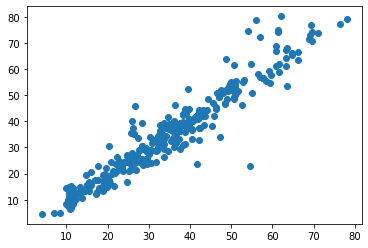

In [47]:
plt.scatter(yprexgb, y_test)

### Grid Search CV

In [241]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
xgb1 = xgb.XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [0.01, .03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train,y_train)

print(xgb_grid.best_score_)

print(xgb_grid.best_params_)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  24 out of  24 | elapsed:    6.1s finished


[18:52:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[18:52:22] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:52:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
0.9150925347867617
{'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


### Random Search CV

In [243]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
xgb1 = xgb.XGBRegressor()
parameters = dict(nthread = [3, 4], #when use hyperthread, xgboost may become slower
              objective = ['reg:linear', 'reg:squarederror'],
              learning_rate= [0.01, .03, 0.05, .07], #so called `eta` value
              max_depth= [5, 6, 7],
              min_child_weight= [1,2,3,4],
              silent= [1],
              subsample= [0.7],
              colsample_bytree= [0.7],
              n_estimators= [500])

clf = RandomizedSearchCV(xgb1, parameters, random_state=0)
search = clf.fit(X_train, y_train)

print(search.best_score_)

print(search.best_params_)

[18:54:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[18:54:46] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:54:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[18:54:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[18:54:46] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\

[18:54:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[18:54:50] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:54:51] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:54:51] WARNING: C:\Users\Administrator\workspace\xg

In [245]:
params = {'subsample': 0.7,
         'silent': 1,
         'objective': 'reg:linear',
         'nthread': 4,
         'n_estimators': 500,
         'min_child_weight': 3,
         'max_depth': 6,
         'learning_rate': 0.03,
         'colsample_bytree': 0.7}
pipeline = Pipeline(steps=[('trans', PolynomialFeatures(degree=3)), ('model', xgb.XGBRegressor(**params))])
pipeline.fit(X_train, y_train)
yprexgb = pipeline.predict(X_test)

[18:57:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[18:57:15] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:57:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


In [247]:
resultsDf_XGBPOpt = pd.DataFrame({'Method':['XGBoostRegressor_Polynomial_Opt'], 'MSE': mean_squared_error(y_test, yprexgb)
                         ,'r2' : r2_score(y_test, yprexgb)})

resultsDf = pd.concat([resultsDf, resultsDf_XGBPOpt])

resultsDf

,Method,MSE,r2
0,Linear Regression,113.544426,0.628470
0,RandomForest,136.571818,0.553122
0,KNeighbors,79.691437,0.739241
0,BayesianRidge,114.277068,0.626073
0,DecisionTreeRegressor,87.521445,0.713620
0,SupportVector,115.355377,0.622544
0,GradientBoostingRegressor,28.641582,0.906282
0,AdaBoostRegressor,65.335225,0.786216
0,XGBoostRegressor,27.345941,0.910521
0,XGBoostRegressor_Polynomial,25.297752,0.917223


### Important Features

[18:07:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[18:07:19] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:07:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[0.17581606 0.06602828 0.06840065 0.09373896 0.07730229 0.03336063
 0.05688749 0.42846563]


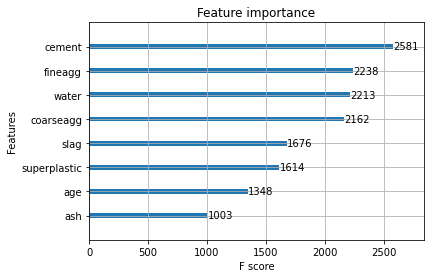

In [135]:
from xgboost import plot_importance
from matplotlib import pyplot

params = {'subsample': 0.7,
         'silent': 1,
         'objective': 'reg:linear',
         'nthread': 4,
         'n_estimators': 500,
         'min_child_weight': 3,
         'max_depth': 6,
         'learning_rate': 0.03,
         'colsample_bytree': 0.7}
final = xgb.XGBRegressor(**params)

model = final.fit(X_train, y_train)

print(model.feature_importances_)
# plot
plot_importance(model)

pyplot.show()

# Validation Score

In [249]:
yprexgb_val = pipeline.predict(X_val)

In [253]:
resultsDf_XGBPOpt = pd.DataFrame({'Method':['XGBoostRegressor_Polynomial_Optimized_Validation'], 'MSE': mean_squared_error(y_val, yprexgb_val)
                         ,'r2' : r2_score(y_val, yprexgb_val)})

resultsDf_XGBPOpt

,Method,MSE,r2
0,XGBoostRegressor_Polynomial_Optimized_Validation,23.958548,0.909643
